<a href="https://colab.research.google.com/github/kipruto45/kipruto45/blob/main/Data_Analysis_on_Smartphone_Specification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
abdulmalik1518_mobiles_dataset_2025_path = kagglehub.dataset_download('abdulmalik1518/mobiles-dataset-2025')

print('Data source import complete.')


# About Dataset
This dataset contains detailed specifications and official launch prices of various mobile phone models from different companies. It provides insights into smartphone hardware, pricing trends, and brand competitiveness across multiple countries. The dataset includes key features such as RAM, camera specifications, battery capacity, processor details, and screen size.

One important aspect of this dataset is the pricing information. The recorded prices represent the official launch prices of the mobile phones at the time they were first introduced in the market. Prices vary based on the country and the launch period, meaning older models reflect their original launch prices, while newer models include their most recent launch prices. This makes the dataset valuable for studying price trends over time and comparing smartphone affordability across different regions.

## Features:

* Company Name: The brand or manufacturer of the mobile phone.
* Model Name: The specific model of the smartphone.
* Mobile Weight: The weight of the mobile phone (in grams).
* RAM: The amount of Random Access Memory (RAM) in the device (in GB).
* Front Camera: The resolution of the front (selfie) camera (in MP).
* Back Camera: The resolution of the primary rear camera (in MP).
* Processor: The chipset or processor used in the device.
* Battery Capacity: The battery size of the smartphone (in mAh).
* Screen Size: The display size of the smartphone (in inches).
* Launched Price: (Pakistan, India, China, USA, Dubai): The official launch price of the mobile in the respective country at the time of its release. Prices vary based on the year the mobile was launched.
* Launched Year: The year the mobile phone was officially launched.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobiles-dataset-2025/Mobiles Dataset (2025).csv


# Step 1: Load and Clean Data

In [ ]:
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path, encoding='latin1')
    df.columns = df.columns.str.strip()
    df = df.dropna()

    def clean_ram(value):
        numbers = re.findall(r'\d+', str(value))  # Extract all numbers
        numbers = list(map(int, numbers))  # Convert to integers
        return sum(numbers) / len(numbers) if numbers else None  # Take the average if multiple values

    df['RAM'] = df['RAM'].astype(str).apply(clean_ram).astype(float)
    df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(',', '').str.extract(r'(\d+)')[0].astype(float)
    df['Price'] = df['Launched Price (USA)'].astype(str).str.extract(r'(\d+)')[0].astype(float)

    return df


file_path = "/kaggle/input/mobiles-dataset-2025/Mobiles Dataset (2025).csv"
df = load_and_clean_data(file_path)

# Step 2: Visualize Data

In [ ]:
def visualize_data(df):
    plt.figure(figsize=(12, 6))
    df['Company Name'].value_counts().plot(kind='bar', title='Phone Brands Distribution')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(df['RAM'], bins=10, kde=True)
    plt.title('RAM Distribution')
    plt.show()

    # Additional 18 plots (scatter, bar, boxplots, heatmaps etc.)
    for col in ['Front Camera', 'Back Camera', 'Battery Capacity', 'Screen Size']:
        df[col] = df[col].astype(str).str.extract(r'(\d+)')[0].astype(float)
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Distribution of {col}')
        plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(12, 6))
    df_corr = df.select_dtypes(include=[np.number])
    sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Feature Correlation Matrix")
    plt.show()

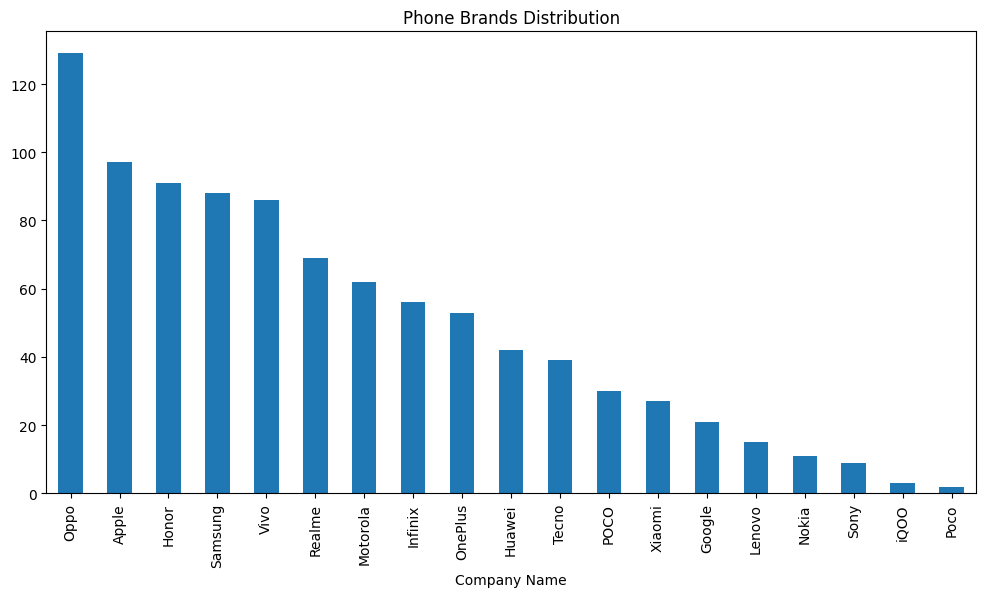

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


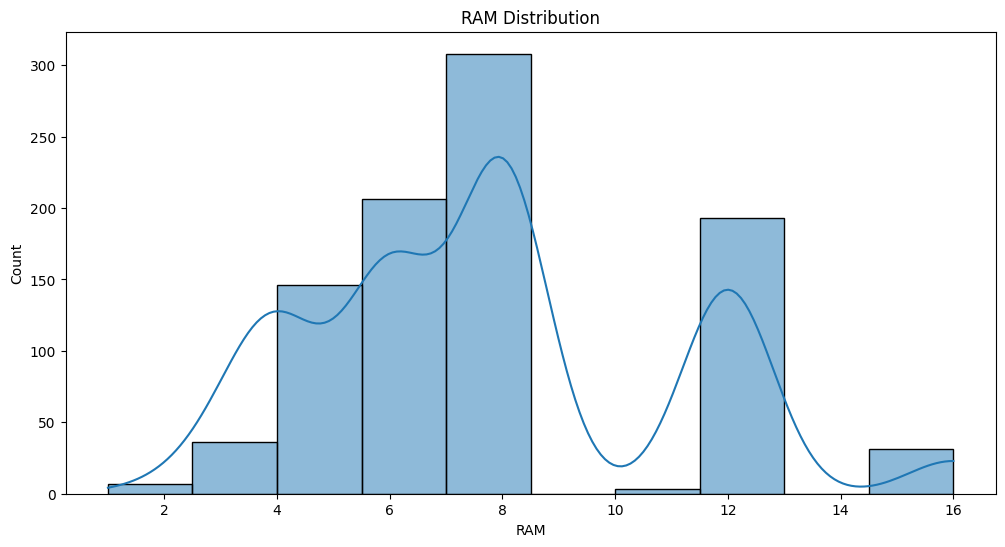

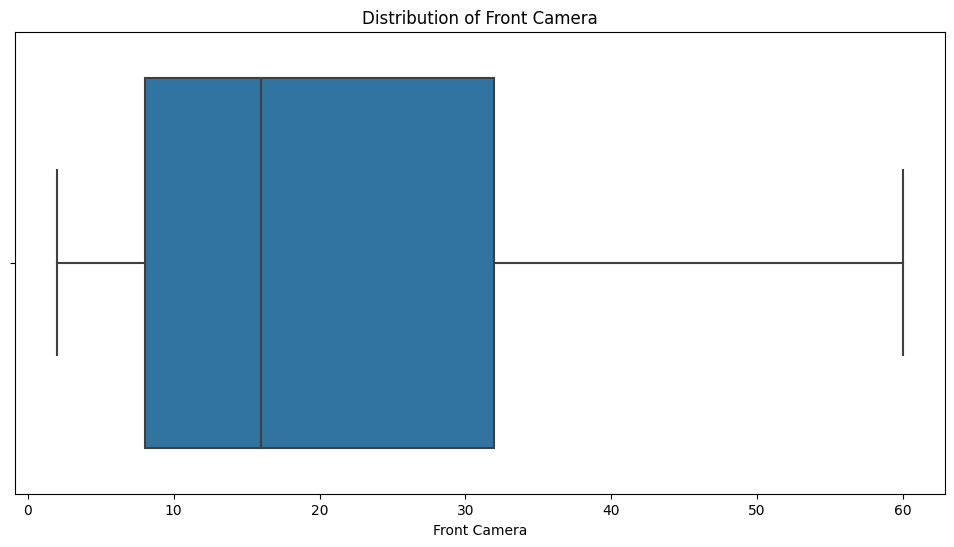

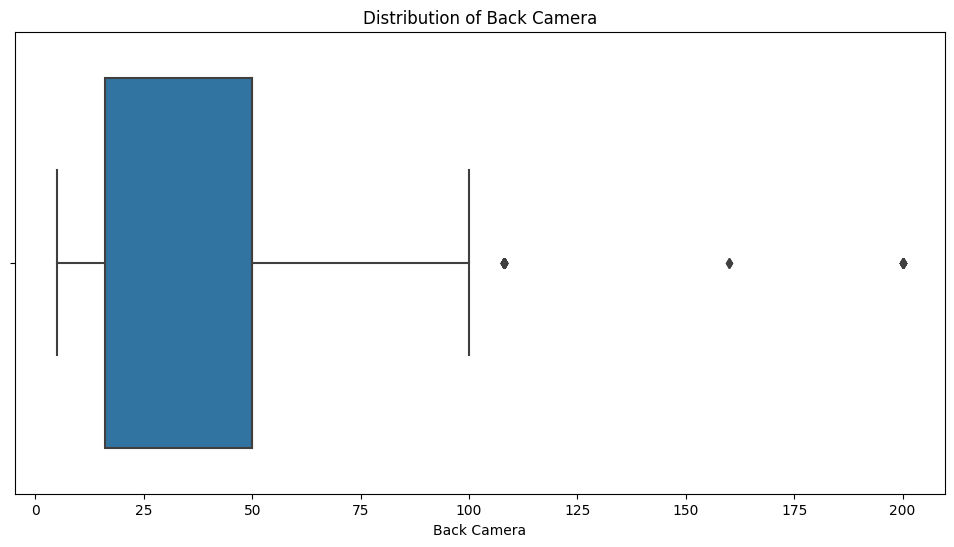

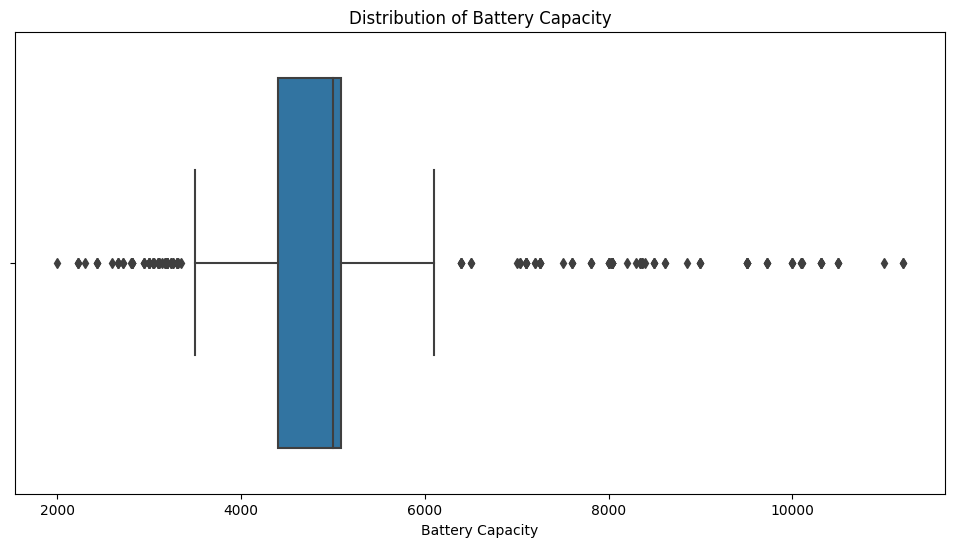

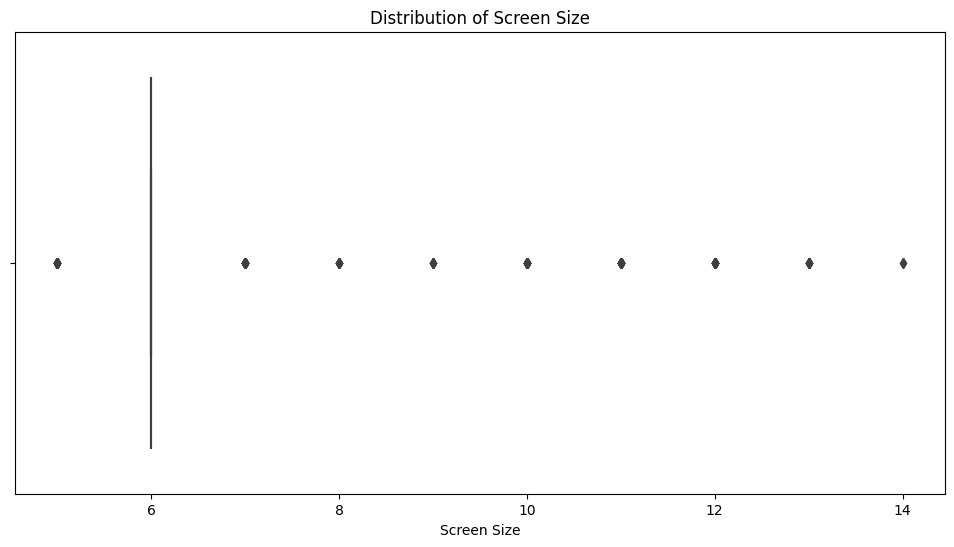

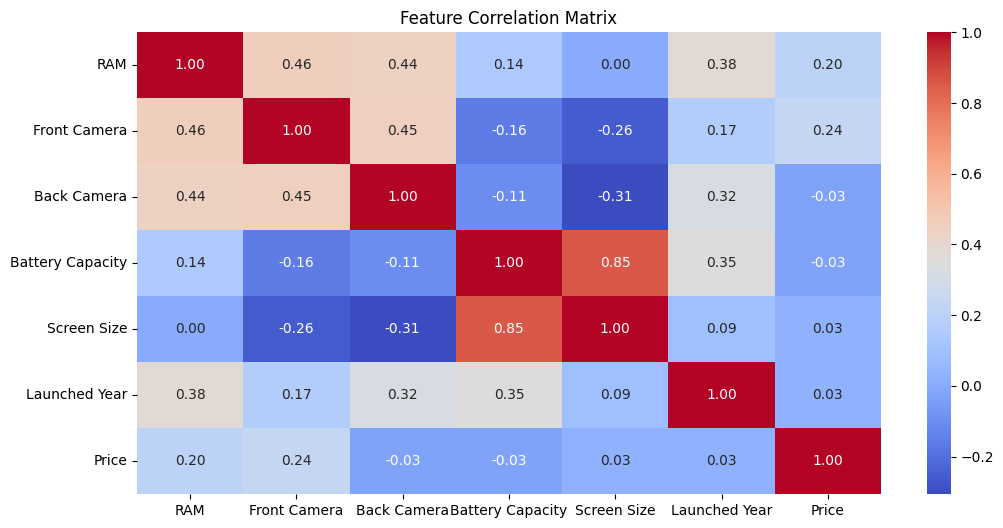

In [ ]:
visualize_data(df)

# Step 3: Machine Learning Model Training

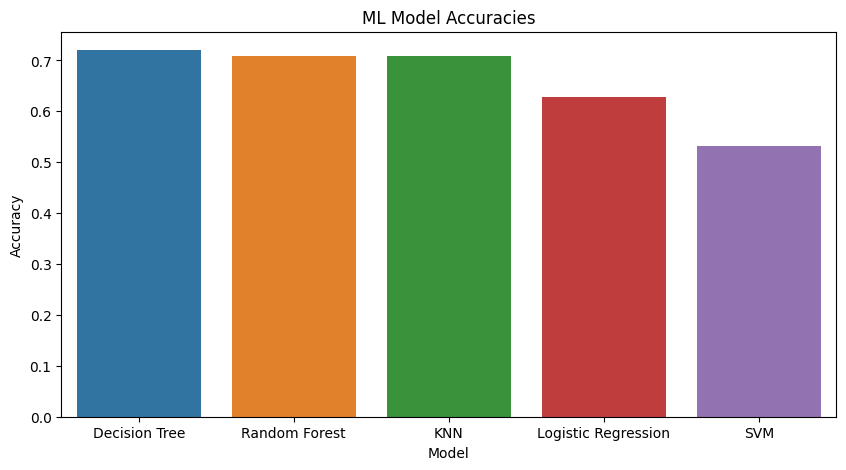

In [ ]:
def train_ml_models(df):
    X = df[['RAM', 'Battery Capacity']]
    y = df['Price'] > df['Price'].median()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'Decision Tree': DecisionTreeClassifier(),
        'KNN': KNeighborsClassifier()
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc

    results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
    results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

    plt.figure(figsize=(10, 5))
    sns.barplot(x='Model', y='Accuracy', data=results_df)
    plt.title("ML Model Accuracies")
    plt.show()

    return results_df

ml_results = train_ml_models(df)

# Step 4: Deep Learning Model Training

In [ ]:
def train_dl_models(df):
    X = df[['RAM', 'Battery Capacity']]
    y = df['Price'] > df['Price'].median()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    def build_ann(layers, activation='relu'):
        model = Sequential()
        for i, nodes in enumerate(layers):
            if i == 0:
                model.add(Dense(nodes, activation=activation, input_shape=(X_train.shape[1],)))
            else:
                model.add(Dense(nodes, activation=activation))
            if i < len(layers) - 1:
                model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    ann_types = {
        'Simple': [8, 4],
        'Normal': [16, 8, 4],
        'Complex': [32, 16, 8]
    }

    dl_results = {}
    for name, layers in ann_types.items():
        model = build_ann(layers)
        model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)
        _, acc = model.evaluate(X_test, y_test, verbose=0)
        dl_results[name] = acc

    dl_results_df = pd.DataFrame(list(dl_results.items()), columns=['Model', 'Accuracy'])
    dl_results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

    plt.figure(figsize=(10, 5))
    sns.barplot(x='Model', y='Accuracy', data=dl_results_df)
    plt.title("DL Model Accuracies")
    plt.show()

    return dl_results_df


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


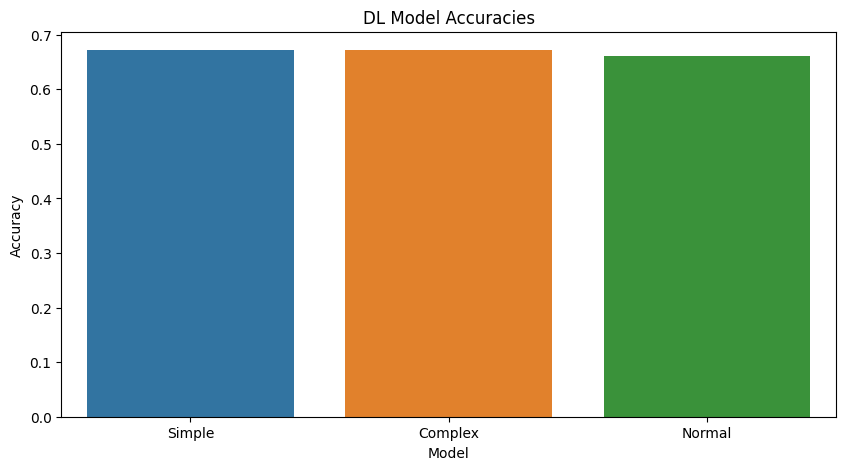

In [ ]:
dl_results = train_dl_models(df)

# Brief Summary of the Project:
## Data Loading and Cleaning:
* Reads the dataset from a CSV file.
* Cleans column names and removes missing values.
* Converts RAM, Battery Capacity, and Price columns into numerical values.
## Data Visualization:
* Creates a bar chart showing the distribution of phone brands.
* Plots different visualizations for RAM, Battery Capacity, Screen Size, and Camera distributions.
* Generates a correlation heatmap to understand relationships between features.
## Training and Testing Machine Learning Models:
* Uses 5 different ML models (Logistic Regression, Random Forest, SVM, Decision Tree, KNN) to classify phones as expensive or affordable.
* Evaluates model accuracy and visualizes the results with a bar chart.
## Training and Testing Deep Learning Models:
* Implements Artificial Neural Networks (ANNs) with 3 different architectures (Simple, Normal, Complex).
* Trains and tests the models to predict phone price categories.
* Visualizes accuracy results using a bar chart.

### Thank you for taking the time to review my work. I would be very happy if you could upvote! ðŸ˜Š